In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick

In [2]:
df=pd.read_csv('indian_elections.dat',  sep='\s+',index_col="Year" )

In [3]:
#df_INC=df.iloc[:10,:2]
#df_BJP=df.iloc[10:,:2]
df_INC=df[df["Party"]=="INC"]
df_BJP=df[df["Party"]=="BJP"]


for x in range(len(df_INC)):
    df_INC.iloc[x,0]=df_INC.iloc[x,0]*100
    df_INC.iloc[x,0]=int(df_INC.iloc[x,0])


df_BJP=df.iloc[10:,:2]


for x in range(len(df_BJP)):
    df_BJP.iloc[x,0]=df_BJP.iloc[x,0]*100
    
df_INC["Perc_Seats"] = df_INC["Perc_Seats"].astype(int)
df_INC["Perc_Seats_%"]=df_INC["Perc_Seats"].astype(str) + "%"

df_BJP["Perc_Seats"] = df_BJP["Perc_Seats"].astype(int)
df_BJP["Perc_Seats_%"]=df_BJP["Perc_Seats"].astype(str) + "%"

/Users/burak.isik/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/burak.isik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/burak.isik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

<IPython.core.display.Javascript object>


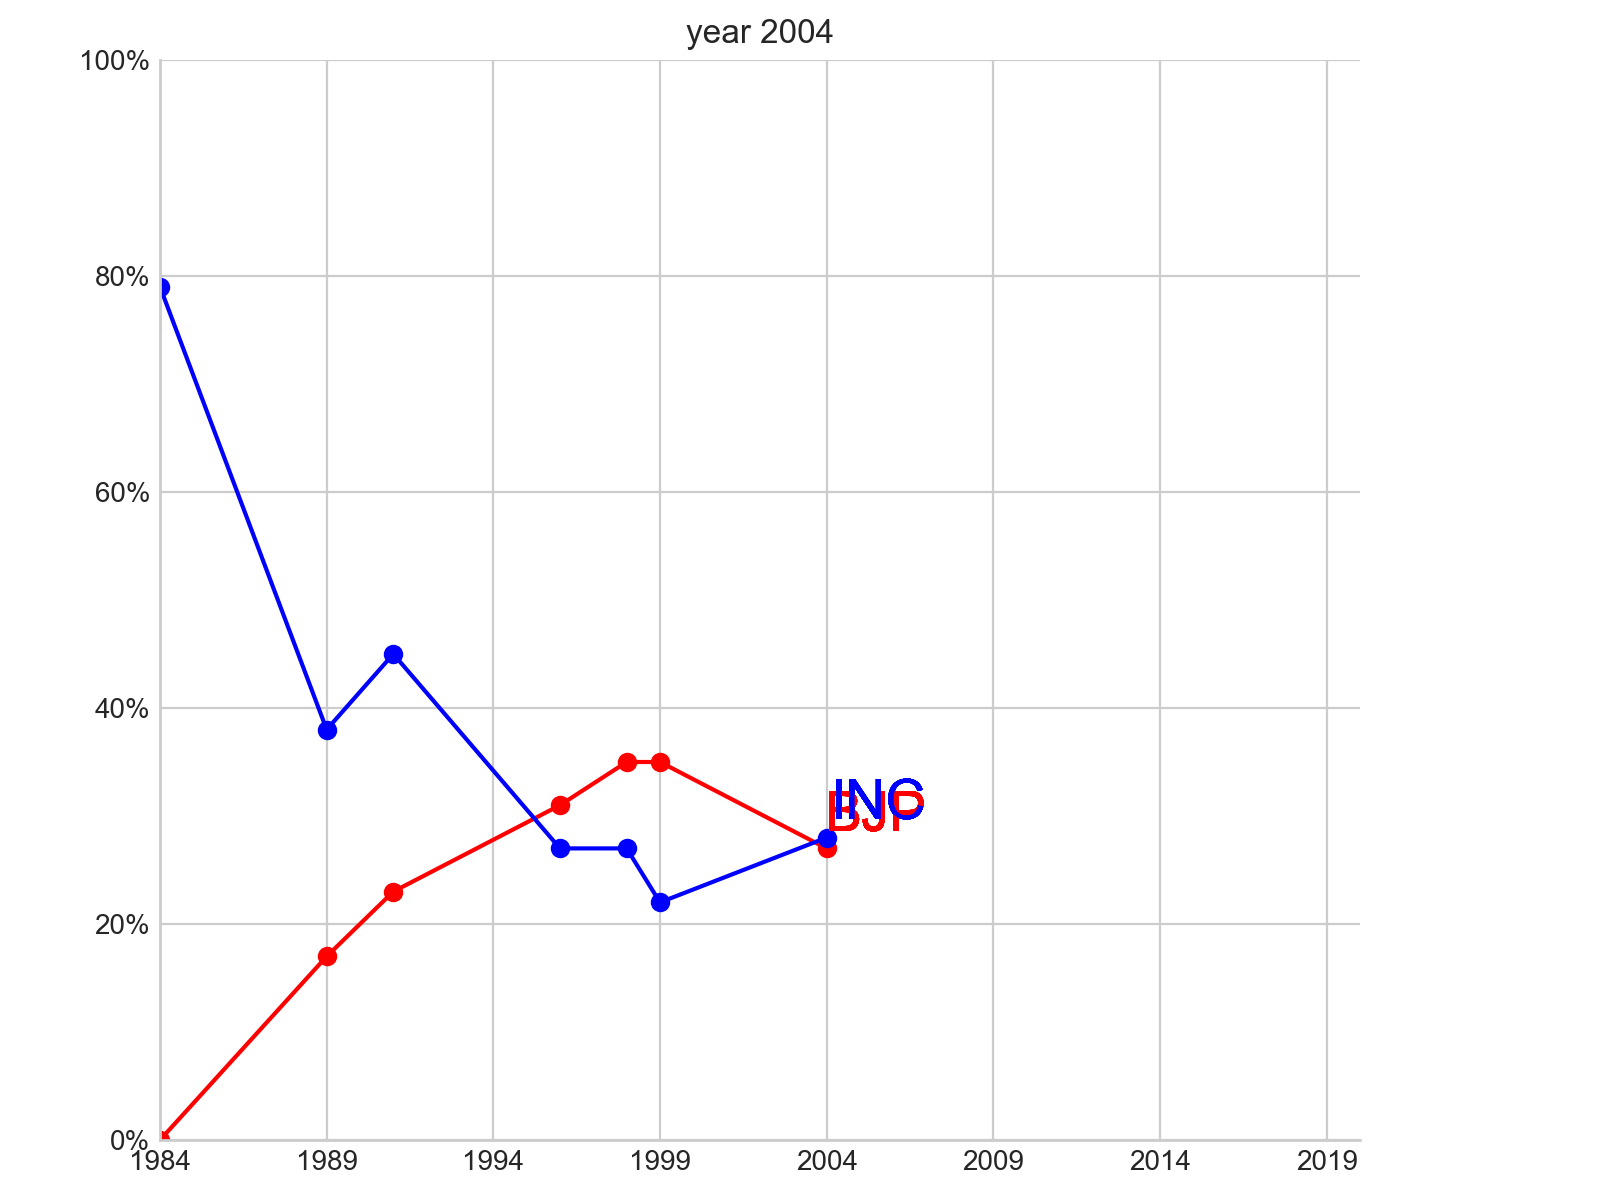

In [4]:
plt.style.use('seaborn-whitegrid')
fig,ax1 = plt.subplots(figsize=(8,6))


ax1.set_position([0.1,0.05,0.75,0.9])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)





line_texts_BJP=[]
line_texts_INC=[]

for a in range(len(df_INC)):
    obj1=ax1.text(df_INC.index[a],df_INC.iloc[a,0],s="",ha="right",va="center",fontsize=20,color="r")
    line_texts_BJP.append(obj1)
    obj2=ax1.text(df_BJP.index[a],df_BJP.iloc[a,0],s="",ha="right",va="center",fontsize=20,color="b")
    line_texts_INC.append(obj2)
    


plt.ylim(0,100)


plt.xticks(np.arange(1984, 2020, step=5))


z=ax1.set_title("year")

fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)

plt.yticks(np.arange(0, 101, step=20))

ln1,=plt.plot([],[],"-or")
ln2,=plt.plot([],[],"-ob")

def init():
    ax1.set_xlim(1984, 2020)

def animate(frame):
    for i in range (len(df_BJP)):
        data1 = df_BJP.iloc[:frame+1,:1] 
        ln1.set_data(data1.index,data1.values)
        line_texts_BJP[i].set_text(df_BJP.iloc[frame,1])
        line_texts_BJP[i].set_position((df_BJP.index[frame]+3,df_BJP.iloc[frame,0]+3))
        
        data2 = df_INC.iloc[:frame+1,:1]
        ln2.set_data(data2.index,data2.values)
        line_texts_INC[i].set_text(df_INC.iloc[frame,1])
        line_texts_INC[i].set_position((df_INC.index[frame]+3,df_INC.iloc[frame,0]+3))
        z.set_text("year {:d}".format(df_INC.index[frame]))
    
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=10,init_func=init,blit=True,interval=500, repeat=True)

plt.show()